# <div align="center"><font size="15">Data Visualization - Laboratory 1</font></div> 

# <div align="center"><font size="10">  Data Relationship </font></div>  

---

<div align="center"><font size="5">Authors</font></div>

|ID|Fullname|
|---------------|---------|
|20127028|Võ Văn Hoàng|
|20127049|Nguyễn Đức Minh|
|20127054|Ngô Văn Trung Nguyên|
|20127092|Nguyễn Minh Tuấn|
|20127214|Nguyễn Trương Minh Khôi|

# 1. Web Crawling

<img src="https://www.worldometers.info/img/worldometers-fb.jpg" style = "margin-left: 45%; height: 50px;"></img> 
We access page ([URL](https://www.worldometers.info/coronavirus/)) to earn data

In [39]:
# Import Web Crawling Libraries

from bs4 import BeautifulSoup
import requests 
import numpy as np
import pandas as pd
import datetime as dt

In [40]:
# Request from Worldometer Page

url = "https://www.worldometers.info/coronavirus/"
req = requests.get(url)
s = BeautifulSoup(req.content, 'html.parser')

In [41]:
# Get all data from Table on Worldometer 

data = s.find_all('tbody')
keys = ['Country, Other', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/1M Pop', 'Death Cases/1M Pop', 'Total Tests', 'Tests/1M Pop',
               'Population']
values = [[], [], [], [], [], [], [], [], [], [], [], [], [], []]
for row in data[0].find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        country = col[1].text.strip()
        values[0].append(country)
        
        totalCases = col[2].text.strip()
        values[1].append(totalCases)
        
        newCases = col[3].text.strip()
        values[2].append(newCases)
        
        totalDeaths = col[4].text.strip()
        values[3].append(totalDeaths)
        
        newDeaths = col[5].text.strip()
        values[4].append(newDeaths)
        
        totalRecovered = col[6].text.strip()
        values[5].append(totalRecovered)
        
        newRecovered = col[7].text.strip()
        values[6].append(newRecovered)
        
        activeCases = col[8].text.strip()
        values[7].append(activeCases)
        
        serious = col[9].text.strip()
        values[8].append(serious)
        
        totalCases_per_m = col[10].text.strip()
        values[9].append(totalCases_per_m)
        
        deaths = col[11].text.strip()
        values[10].append(deaths)
        
        totalTests = col[12].text.strip()
        values[11].append(totalTests)
        
        tests_per_m = col[13].text.strip()
        values[12].append(tests_per_m)
        
        population = col[14].text.strip()
        values[13].append(population)
    covid_data = dict(zip(keys, values))

In [42]:
# Get lastest update time of data

date = s.find('div', class_ = 'content-inner').text
start = date.find('Last updated')
end = date.find('GMT')
date = date[start:end]

In [43]:
# Turn crawled data to DataFrame
df = pd.DataFrame(covid_data)

# Add column of Date Crawling
df['Date'] = date

# Save csv file of DataFrame crawl of that day
df.to_csv('covid_day_15.csv', index=False)

---

# 2. Explore Data

In [44]:
# Concatenating Files Library
import glob
import pandas as pd

# Visualizing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

# Converting Code of Countries Libraries
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pycountry
import plotly.graph_objects as go

# Other necessary Libraries

## For time handling
import datetime as dt

## For string handling
import re             

#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['covid_day2.csv',
 'covid_day3.csv',
 'covid_day4.csv',
 'covid_day5.csv',
 'covid_day6.csv',
 'covid_day7.csv',
 'covid_day8.csv',
 'covid_day9.csv',
 'covid_day_10.csv',
 'covid_day_11.csv',
 'covid_day_12.csv',
 'covid_day_13.csv',
 'covid_day_14.csv',
 'covid_day_15.csv',
 'covid_day_15a.csv',
 'covid_day_16.csv',
 'covid_day_17.csv',
 'covid_day_18.csv']

In [45]:
country_df = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
country_df

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M Pop,Death Cases/1M Pop,Total Tests,Tests/1M Pop,Population,Date
0,North America,"124,590,104",NaN,"1,611,388",NaN,"119,822,564","+1,341","3,156,152","7,699",NaN,NaN,NaN,NaN,NaN,"Last updated: March 01, 2023, 13:47"
1,Asia,"214,353,455","+40,182","1,536,768",162.0,"198,988,145","+36,813","13,828,542","15,498",NaN,NaN,NaN,NaN,NaN,"Last updated: March 01, 2023, 13:47"
2,Europe,"246,314,132","+31,143","2,017,091",79.0,"241,915,929","+51,040","2,381,112","6,491",NaN,NaN,NaN,NaN,NaN,"Last updated: March 01, 2023, 13:47"
3,South America,"68,008,352",+281,"1,350,611",8.0,"66,272,789",+264,"384,952","10,192",NaN,NaN,NaN,NaN,NaN,"Last updated: March 01, 2023, 13:47"
4,Oceania,"13,996,296",NaN,"26,116",NaN,"13,834,559",NaN,"135,621",64,NaN,NaN,NaN,NaN,NaN,"Last updated: March 01, 2023, 13:47"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",NaN,NaN,NaN,799,"Last updated: March 17, 2023, 13:55"
4298,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,2,NaN,NaN,"626,161","Last updated: March 17, 2023, 13:55"
4299,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"Last updated: March 17, 2023, 13:55"
4300,Tokelau,5,NaN,NaN,NaN,NaN,NaN,5,NaN,"3,628",NaN,NaN,NaN,"1,378","Last updated: March 17, 2023, 13:55"


Preprocess

In [46]:
# This function is to add Alpha-3 Code to a country in DataFrame

def country_to_alpha3(countries):
    """
    Map country names to their corresponding ISO 3166-1 alpha-3 codes.

    Args:
    countries (list): A list of country names.

    Returns:
    A list of ISO 3166-1 alpha-3 codes for the given country names.
    """
    alpha3_codes = []
    for country in countries:
        if isinstance(country, str):
            try:
                alpha3_codes.append(pycountry.countries.get(name=country).alpha_3)
            except AttributeError:
                alpha3_codes.append(None)
        else:
            alpha3_codes.append(None)
    return alpha3_codes

In [47]:
# This function is to add Continent that the country belongs to in DataFrame

def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

In [48]:
# Function to preprocess DataFrame

def preprocess_df(df):
    df.dropna(subset = ['Country, Other'], inplace = True)
    
    for col in df.columns:
        if col == 'New Deaths':
            continue
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].str.replace('.', '', regex = True)
        df[col] = df[col].str.replace('+', '', regex = True)
    
    df['Date'] = df['Date'].str.replace('Last updated: ', '')
    df['Date'] =  pd.to_datetime(df['Date'], format = '%B %d %Y %H:%M ')
    numeric_header = list(df.columns)
    numeric_header.remove('Country, Other')
    numeric_header.remove('Date')

    for col in df.columns:
        if col in numeric_header:
            df[col] = df[col].astype(float).astype('Int64')
            
    
    df = df.fillna(0)
    
    country = list(df['Country, Other'])
    encode = country_to_alpha3(country)
    se = pd.Series(encode)
    df['Alpha-3'] = se.values
    
    df.loc[df['Country, Other'] == 'USA', 'Alpha-3'] = 'USA'
    df.loc[df['Country, Other'] == 'S Korea', 'Alpha-3'] = 'KOR'
    df.loc[df['Country, Other'] == 'UK', 'Alpha-3'] = 'GBR'
    df.loc[df['Country, Other'] == 'Russia', 'Alpha-3'] = 'RUS'
    df.loc[df['Country, Other'] == 'Vietnam', 'Alpha-3'] = 'VNM'
    df.loc[df['Country, Other'] == 'Taiwan', 'Alpha-3'] = 'TWN'
    df.loc[df['Country, Other'] == 'Iran', 'Alpha-3'] = 'IRN'
    df.loc[df['Country, Other'] == 'DPRK', 'Alpha-3'] = 'USA'
    df.loc[df['Country, Other'] == 'Bolivia', 'Alpha-3'] = 'BOL'
    df.loc[df['Country, Other'] == 'UAE', 'Alpha-3'] = 'ARE'
    df.loc[df['Country, Other'] == 'Palestine', 'Alpha-3'] = 'PSE'
    df.loc[df['Country, Other'] == 'Moldova', 'Alpha-3'] = 'MDA'
    df.loc[df['Country, Other'] == 'Venezuela', 'Alpha-3'] = 'VEN'
    df.loc[df['Country, Other'] == 'Brunei', 'Alpha-3'] = 'BRN'
    df.loc[df['Country, Other'] == 'Laos', 'Alpha-3'] = 'LAO'
    df.loc[df['Country, Other'] == 'DRC', 'Alpha-3'] = 'COD'
    df.loc[df['Country, Other'] == 'Syria', 'Alpha-3'] = 'SYR'
    df.loc[df['Country, Other'] == 'Tanzania', 'Alpha-3'] = 'TZA'
    df.loc[df['Country, Other'] == 'Micronesia', 'Alpha-3'] = 'FSM'
    df.loc[df['Country, Other'] == 'CAR', 'Alpha-3'] = 'CAF'
    df.loc[df['Country, Other'] == 'Saint Martin', 'Alpha-3'] = 'MAF'
    df.loc[df['Country, Other'] == 'Sint Maarten', 'Alpha-3'] = 'SXM'
    df.loc[df['Country, Other'] == 'St Vincent Grenadines', 'Alpha-3'] = 'VCT'
    df.loc[df['Country, Other'] == 'Turks and Caicos', 'Alpha-3'] = 'TCA'
    df.loc[df['Country, Other'] == 'St Barth', 'Alpha-3'] = 'BLM'
    df.loc[df['Country, Other'] == 'Saint Pierre Miquelon', 'Alpha-3'] = 'SPM'
    df.loc[df['Country, Other'] == 'Saint Helena', 'Alpha-3'] = 'SHN'
    df.loc[df['Country, Other'] == 'Falkland Islands', 'Alpha-3'] = 'FLK'
    df.loc[df['Country, Other'] == 'DPRK', 'Alpha-3'] = 'PRK'
    
    df['Continent'] = df['Country, Other'].apply(lambda x: get_continent(x))
    df['Continent'] = df['Continent'].map({'AF': 'Africa', 
                                                       'AS': 'Asia',
                                                       'EU': 'Europe', 
                                                       'NA': 'North America', 
                                                       'OC': 'Oceanic', 
                                                       'SA': 'South America'
                                                        })
    df[df['Continent'].isna()]
    country_to_continent = {
        "S Korea": "Asia",
        "UK": "Europe",
        "DPRK": "Asia",
        "UAE": "Asia",
        "Channel Islands": "Europe",
        "DRC": "Africa",
        "Faeroe Islands": "Europe",
        "Timor-Leste": "Asia",
        "CAR": "Africa",
        "Caribbean Netherlands": "North America",
        "Sint Maarten": "North America",
        "St Vincent Grenadines": "North America",
        "St Barth": "North America",
        "Saint Pierre Miquelon": "Europe",
        "Saint Helena": "Africa",
        "Diamond Princess": "Europe",
        "Vatican City": "Europe",
        "Western Sahara": "Africa",
        "MS Zaandam": "Europe"
    }
    for country, continent in country_to_continent.items():
        df.loc[df["Country, Other"] == country, "Continent"] = continent

    return df

country_df = preprocess_df(country_df)

In [49]:
country_df.head(20)

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M Pop,Death Cases/1M Pop,Total Tests,Tests/1M Pop,Population,Date,Alpha-3,Continent
0,North America,124590104,0,1611388,0,119822564,1341,3156152,7699,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
1,Asia,214353455,40182,1536768,162,198988145,36813,13828542,15498,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
2,Europe,246314132,31143,2017091,79,241915929,51040,2381112,6491,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
3,South America,68008352,281,1350611,8,66272789,264,384952,10192,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
4,Oceania,13996296,0,26116,0,13834559,0,135621,64,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
5,Africa,12794281,0,258582,0,12075245,24,460454,548,0,0,0,0,0,2023-03-01 13:47:00,None,NaN
7,World,680057341,71606,6800571,249,652909937,89482,20346833,40492,87245,8724,0,0,0,2023-03-01 13:47:00,None,NaN
8,USA,105285347,0,1145661,0,102682399,0,1457287,2533,314467,3422,1166932082,3485405,334805269,2023-03-01 13:47:00,USA,North America
9,India,44686611,0,530772,0,44153504,0,2335,0,31769,377,918679922,653106,1406631776,2023-03-01 13:47:00,IND,Asia
10,France,39622231,0,164963,0,39387145,0,70123,869,604140,2515,271490188,4139547,65584518,2023-03-01 13:47:00,FRA,Europe


---

# 1. Overview to world pandemic

### 1.1. Take a look at World's total cases, total recovered cases

- We choose global heatmap for better visualization about a look into Covid-19 in the world

In [50]:
new_df = pd.read_csv("covid_day_15a.csv")
new_df = preprocess_df(new_df)
new_df = new_df[~new_df['Alpha-3'].isna()]

In [51]:
colors = ['#FF8080', '#FF1A1A', '#CC0000']
fig = px.choropleth(new_df, locations = 'Alpha-3', color = 'Total Cases', projection = 'natural earth'
                    , color_continuous_scale=colors, title = 'World Heatmap on Total Positive Cases 15/03/2023')
# display the heatmap
fig.show()

- The World has been tremendously affected by this virus for 4 years, almost all countries were detroyed by this pandemic

In [52]:
colors = ['#80FF80', '#00FF00', '#00B300']
fig = px.choropleth(new_df, locations = 'Alpha-3', color = 'Total Recovered', projection = 'natural earth'
                    , color_continuous_scale=colors, title = 'World Heatmap of Total Recovered Cases 15/03/2023')
# display the heatmap
fig.show()

- However, there are still a lot of cases to overcome this disease, it may not be a big deal for any nations

- What is the percentage of Total Recovered, Total Deaths and Active Cases ?
- We use donut chart to show percentage

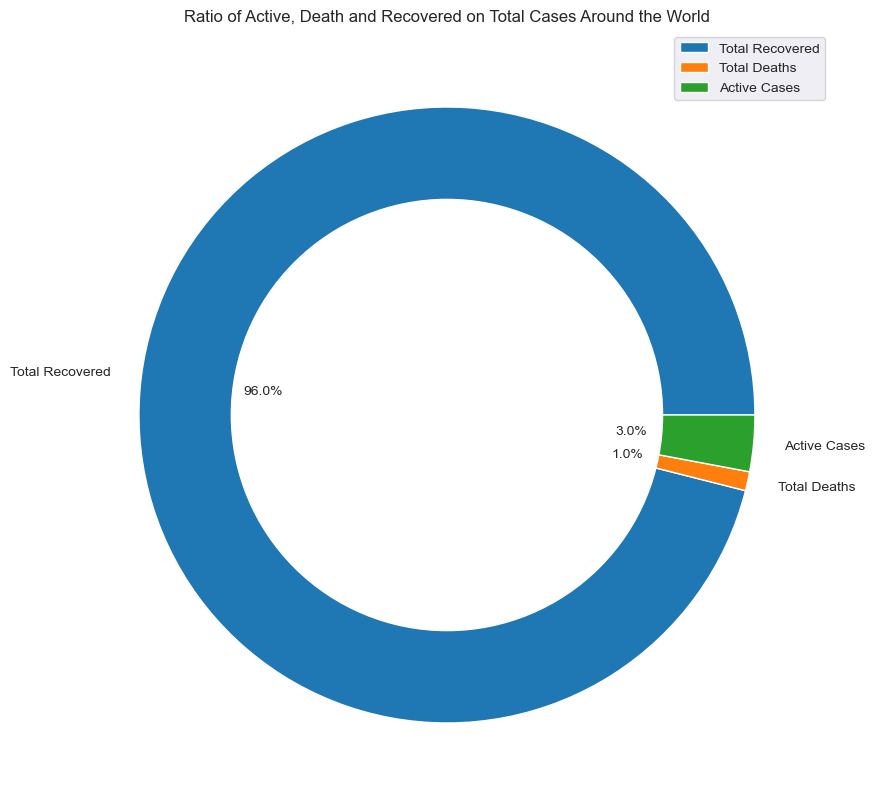

In [53]:
world_cases = country_df[country_df['Country, Other'] == 'World']
world_cases = world_cases[world_cases['Date'] == '2023-03-15 01:08:00']

labels = ['Total Recovered', 'Total Deaths', 'Active Cases']

recov = world_cases['Total Recovered'] / world_cases['Total Cases']
deat = world_cases['Total Deaths'] / world_cases['Total Cases']
active = world_cases['Active Cases'] / world_cases['Total Cases']

values = [recov.values[0], deat.values[0], active.values[0]]

colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10, 10))
plt.pie(values, labels = labels, autopct='%1.1f%%')

my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.title('Ratio of Active, Death and Recovered on Total Cases Around the World')
plt.show()

- Covid-19 spreads rapidly and widely but it has low mortality risk. Most people overcome this disease around the World

### 1.2. Covid-19 in the last few days

- Let's see how Covid-19's Total Cases, Total Deaths, Total Recovered and Active Cases change around the world in the last few days.
- We use line chart to track changes over short periods of time

In [54]:
country = list(country_df['Country, Other'])
encode = country_to_alpha3(country)
se = pd.Series(encode)
country_df['Alpha-3'] = se.values

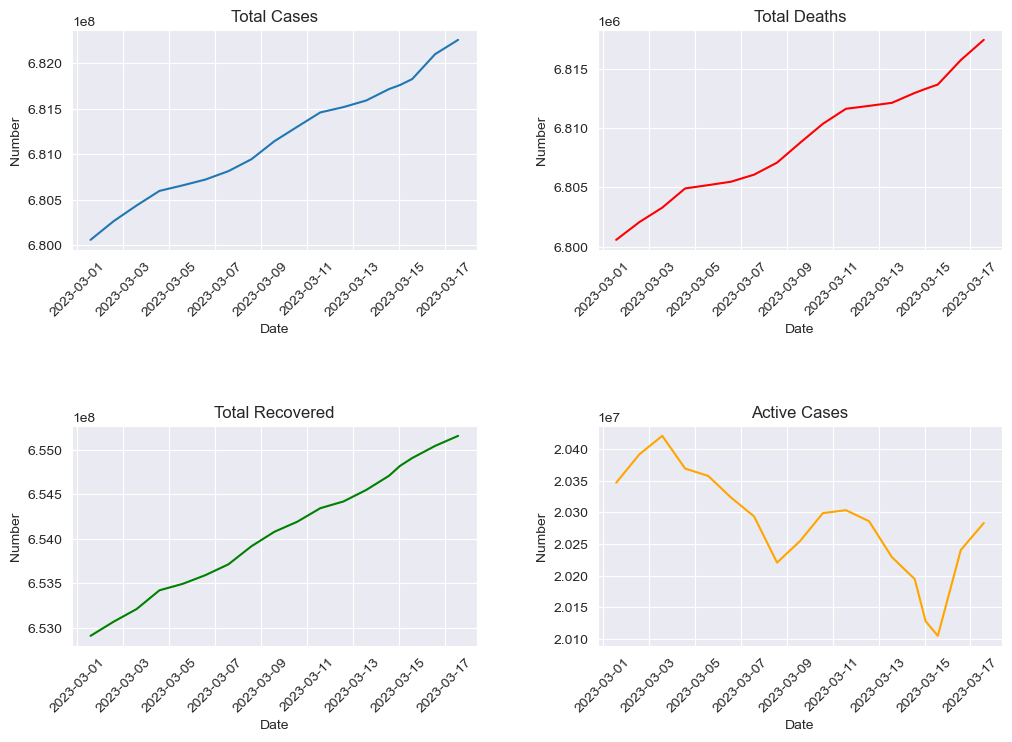

In [55]:
covid_world = country_df[country_df['Country, Other'] == 'World']
covid_world = covid_world[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Date']]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(covid_world['Date'].tolist(), covid_world['Total Cases'].tolist())
axs[0, 1].plot(covid_world['Date'].tolist(), covid_world['Total Deaths'].tolist(), color='red')
axs[1, 0].plot(covid_world['Date'].tolist(), covid_world['Total Recovered'].tolist(), color='green')
axs[1, 1].plot(covid_world['Date'].tolist(), covid_world['Active Cases'].tolist(), color='orange')

axs[0, 0].set_title('Total Cases')
axs[0, 1].set_title('Total Deaths')
axs[1, 0].set_title('Total Recovered')
axs[1, 1].set_title('Active Cases')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Number')

for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(hspace=0.8, wspace=0.3)

plt.show()

- The cases still on the upward trend, the active cases now on the way down which means Corona virus is now not a huge problem a round the World

- Now, let's take a look at New Cases, New Deaths, New Recovered

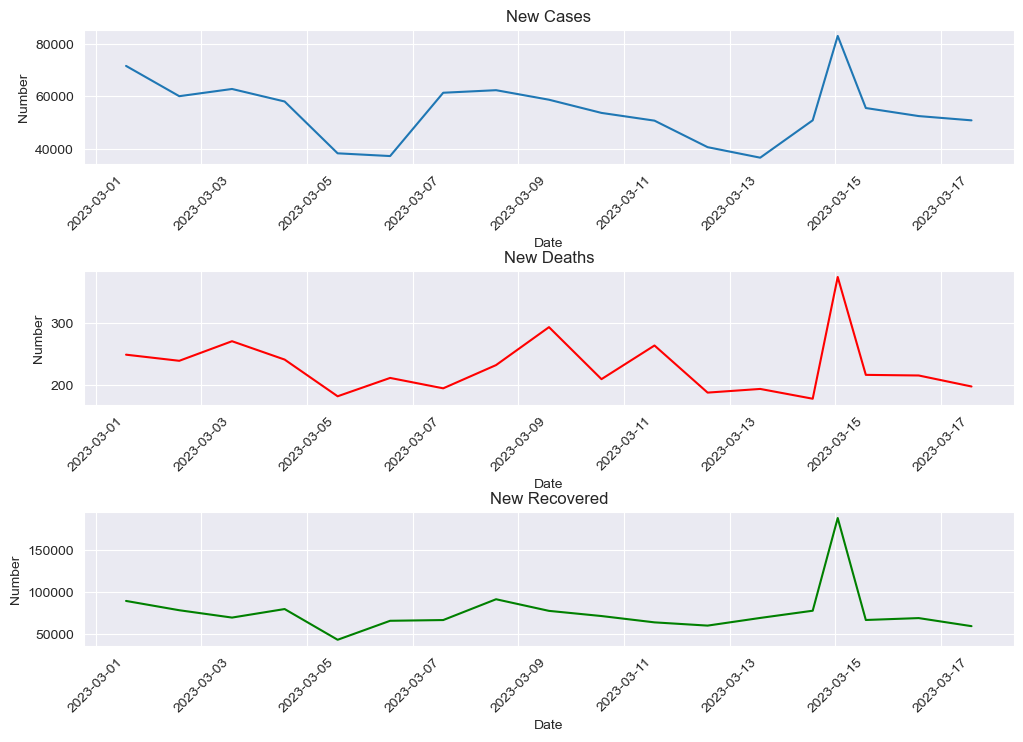

In [56]:
covid_world = country_df[country_df['Country, Other'] == 'World']
covid_world = covid_world[['New Deaths', 'New Recovered', 'New Cases', 'Date']]
fig, axs = plt.subplots(3, figsize=(12, 8))
axs[0].plot(covid_world['Date'].tolist(), covid_world['New Cases'].tolist())
axs[1].plot(covid_world['Date'].tolist(), covid_world['New Deaths'].tolist(), color='red')
axs[2].plot(covid_world['Date'].tolist(), covid_world['New Recovered'].tolist(), color='green')

axs[0].set_title('New Cases')
axs[1].set_title('New Deaths')
axs[2].set_title('New Recovered')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Number')

for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(hspace=0.8, wspace=0.3)

plt.show()

### 1.3. Covid-19 lated cases

In [57]:
fig = px.choropleth(new_df, locations = 'Alpha-3', color = 'New Cases', projection = 'natural earth'
                    , color_continuous_scale="reds", title = 'World Heatmap of New Cases on 15/03/2023')
# display the heatmap
fig.show()

- As you see, the pandemic is not serious now on but today, some of big nations such as Russia, USA, Japan, South Korea, Taiwan are still be influenced  
You could see some nations sharing borders or close to one another have high indicates of New Cases and Active Cases like Russia, Japan, South Korea, Taiwan,... Also Poland is so closed to Russia

- By observations, Almost all patients would be recovered, only 1% of them rest in peace. However, that 1% equals to about 7 millions people. Therefore, we should dig more to get insight

### 1.4. How do attributes correlate to each other

- We use correlation heatmap here to find potential relationships between attributes and to understand the strength of these relationships

In [58]:
country_df = country_df[~country_df['Country, Other'].isin(['North America', 'Asia', 'Europe', 'South America', 'Oceania', 'Africa', 'World'])]

C:\Users\42nvt\AppData\Local\Temp\ipykernel_11324\4058192908.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



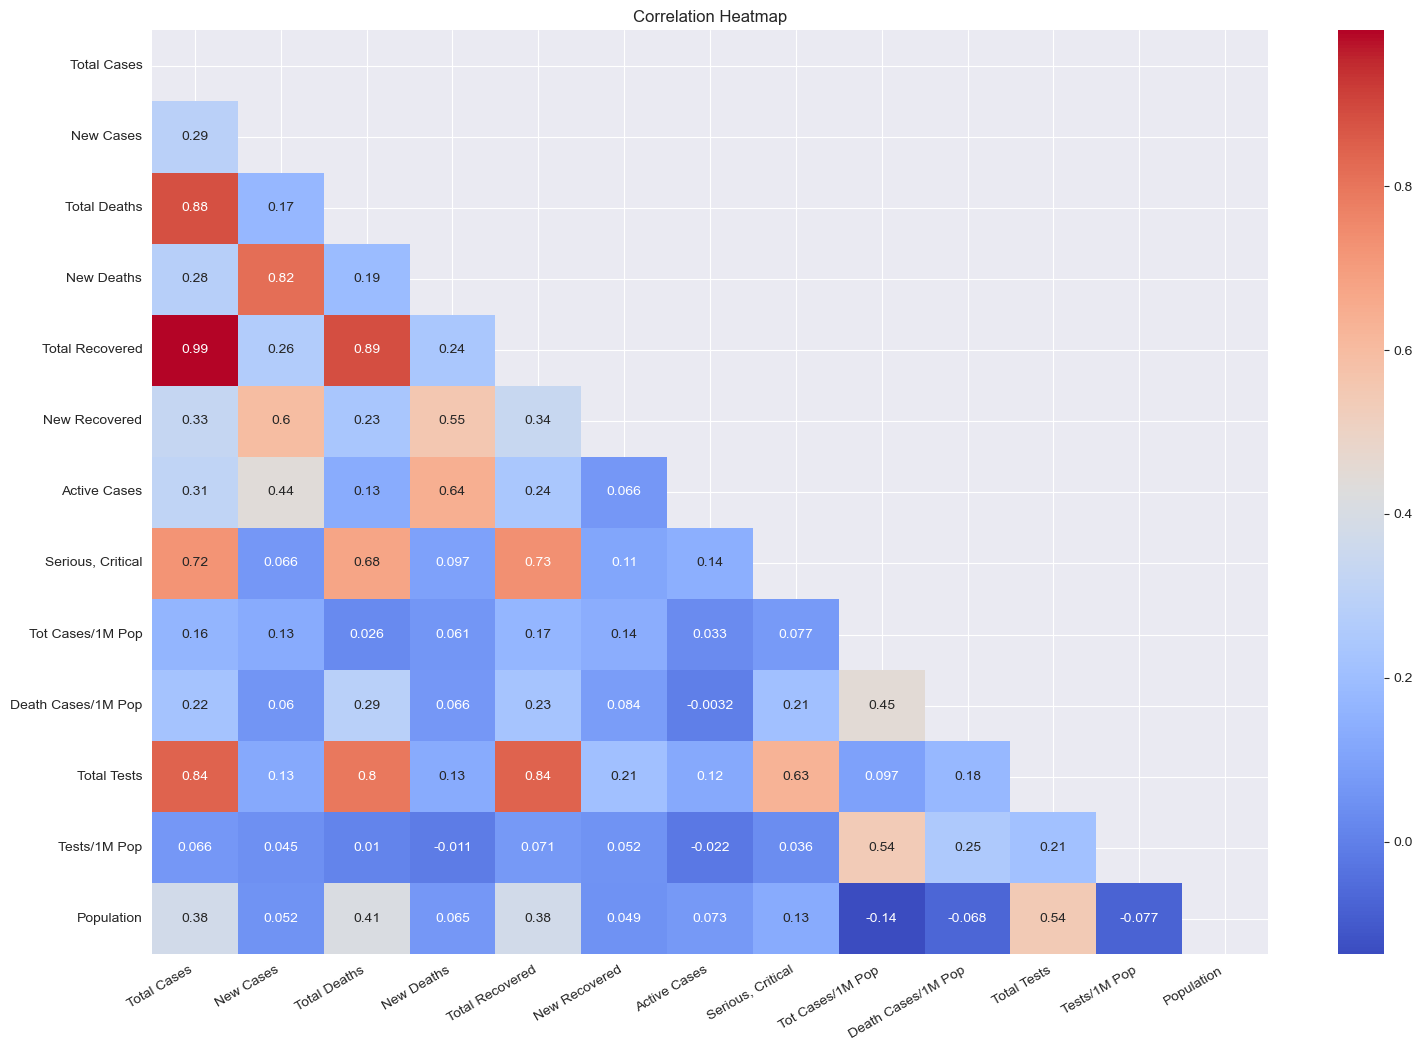

In [59]:
df_corr = country_df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap");
plt.xticks(rotation=30, ha='right');

- By Using Correlation Heatmap, there are some pairs of attributes to really positively correlated to each other. That means these pairs of attributes show strongly about Cause-Effect context  
    + For Example: Total Recovered - Total Cases (0.99), Total Death - Total Cases (0.88),...
- We are going to mine deeper to get some interesting insights

### 1.5. Active cases and new cases relationship

- We use scatter plot to show the relationships between New Cases and Active Cases for all countries.

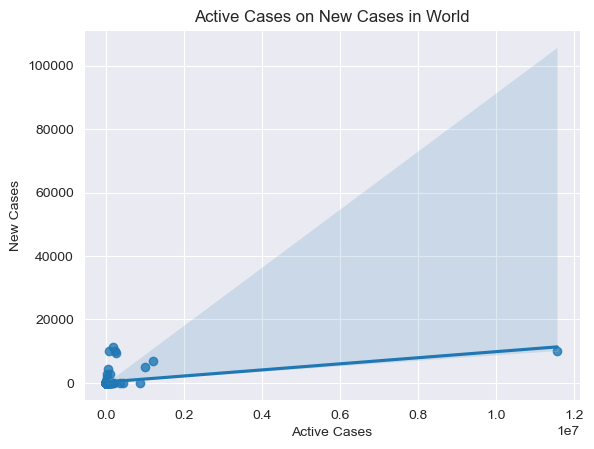

In [60]:
df = pd.read_csv("covid_day_15a.csv")
df = preprocess_df(df)
df = df[~df['Country, Other'].isin(['North America', 'Asia', 'Europe', 'South America', 'Oceania', 'Africa', 'World'])]


x = np.array((df['Active Cases']).tolist())
y = np.array((df['New Cases']).tolist())
sns.regplot(x=x, y=y);
plt.xlabel('Active Cases')
plt.ylabel('New Cases')
plt.title('Active Cases on New Cases in World');

### 1.6. Recovery Rate and Active Rate relationship

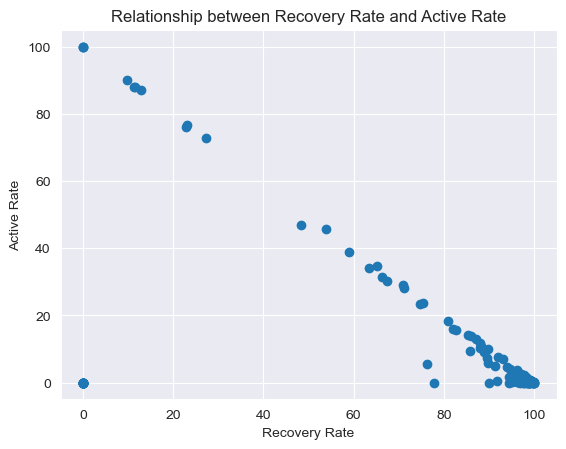

In [61]:
df = pd.read_csv("covid_day_15a.csv")
df = preprocess_df(df)
df = df[~df['Country, Other'].isin(['North America', 'Asia', 'Europe', 'South America', 'Oceania', 'Africa', 'World'])]

df['Mortality Rate'] = df['Total Deaths'] / df['Total Cases'] * 100
df['Recovery Rate'] = df['Total Recovered'] / df['Total Cases'] * 100
df['Active Rate'] = df['Active Cases'] / df['Total Cases'] * 100

# Create a scatter plot
plt.scatter(df['Recovery Rate'], df['Active Rate'])

# Set the title and axis labels
plt.title('Relationship between Recovery Rate and Active Rate')
plt.xlabel('Recovery Rate')
plt.ylabel('Active Rate')

# Show the plot
plt.show()

---

## 2. Continent comparison

### 2.1. Total Cases, Total Deaths, Total Recovered and Active Cases comparison betweeen continents

- We use pie chart to show percentage of each continents

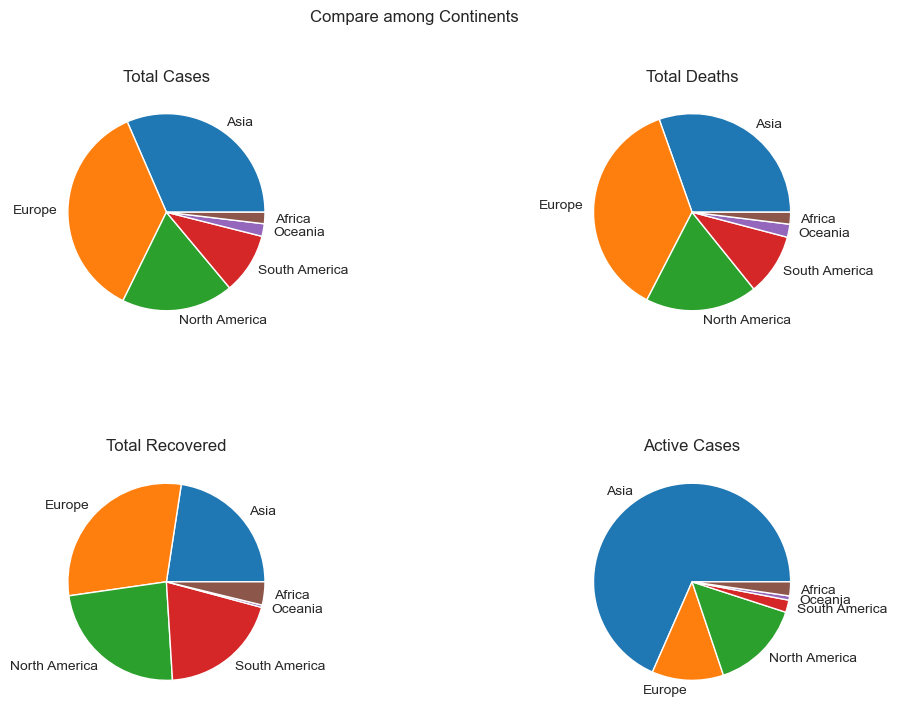

In [62]:
covid_df_day_14 = pd.read_csv('covid_day_14.csv')
covid_df_day_14 = preprocess_df(covid_df_day_14)

asia_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'Asia']
europe_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'Europe']
NA_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'North America']
SA_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'South America']
oceania_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'Oceania']
africa_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'Africa']

total_cases_ratio = [asia_df['Total Cases'].tolist()[0], europe_df['Total Cases'].tolist()[0], 
                     NA_df['Total Cases'].tolist()[0], SA_df['Total Cases'].tolist()[0], 
                     oceania_df['Total Cases'].tolist()[0], africa_df['Total Cases'].tolist()[0]]

total_recovered_ratio = [asia_df['Total Recovered'].tolist()[0], europe_df['Total Recovered'].tolist()[0],
                         NA_df['Total Recovered'].tolist()[0], SA_df['Total Recovered'].tolist()[0], 
                         oceania_df['Total Cases'].tolist()[0], africa_df['Total Cases'].tolist()[0]]

total_deaths_ratio = [asia_df['Total Deaths'].tolist()[0], europe_df['Total Deaths'].tolist()[0], 
                      NA_df['Total Deaths'].tolist()[0], SA_df['Total Deaths'].tolist()[0], 
                      oceania_df['Total Deaths'].tolist()[0], africa_df['Total Deaths'].tolist()[0]]

active_cases_ratio = [asia_df['Active Cases'].tolist()[0], europe_df['Active Cases'].tolist()[0], 
                      NA_df['Active Cases'].tolist()[0], SA_df['Active Cases'].tolist()[0], 
                      oceania_df['Active Cases'].tolist()[0], africa_df['Active Cases'].tolist()[0]]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
continents = ['Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Africa']
axs[0, 0].pie(total_cases_ratio, labels = continents)
axs[0, 1].pie(total_recovered_ratio, labels = continents)
axs[1, 0].pie(total_deaths_ratio, labels = continents)
axs[1, 1].pie(active_cases_ratio, labels = continents)

axs[0, 0].set_title('Total Cases')
axs[0, 1].set_title('Total Deaths')
axs[1, 0].set_title('Total Recovered')
axs[1, 1].set_title('Active Cases')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Compare among Continents')
plt.show()

- We can clearly see that Asia an Europe always be in top 1 or 2 in 4 charts above. Although Asia has way bigger population than Europe, they look the same in Total Cases, Total Deaths and Total Recovered. But at the moment, Asia has the highest Active Cases, more than half of all active cases.

### 2.2. Let's take a deeper look. Compare continents' Mortality Rate, Recovery Rate and Active Rate

- We use stacked bar chart to show Mortality Rate, Recovery Rate and Active Rate comparisons between continents

In [63]:
country_df = country_df.fillna(0)

In [64]:
country_df['Mortality Rate'] = round(country_df['Total Deaths']/country_df['Total Cases']*100, 2)
country_df['Recovery Rate'] = round(country_df['Total Recovered']/country_df['Total Cases']*100, 2)
country_df['Active Rate'] = round(country_df['Active Cases']/country_df['Total Cases']*100, 2)

In [65]:
# Calculate Mortality Rate, Recovery Rate, and Active Rate for each continent
continent_df = country_df.groupby('Continent').agg({
    'Total Cases': 'sum',
    'Total Deaths': 'sum',
    'Total Recovered': 'sum',
    'Active Cases': 'sum'
})
continent_df['Mortality Rate'] = continent_df['Total Deaths'] / continent_df['Total Cases'] * 100
continent_df['Recovery Rate'] = continent_df['Total Recovered'] / continent_df['Total Cases'] * 100
continent_df['Active Rate'] = continent_df['Active Cases'] / continent_df['Total Cases'] * 100

continent_df = continent_df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Mortality Rate', 'Recovery Rate', 'Active Rate']]

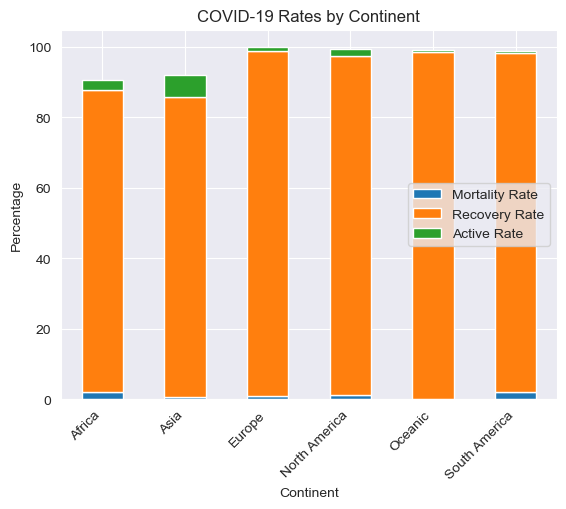

In [66]:
# Plot the stacked bar chart
continent_df[['Mortality Rate', 'Recovery Rate', 'Active Rate']].plot(kind='bar', stacked=True)
# Set the title and axis labels
plt.title('COVID-19 Rates by Continent')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right');

- From the chart above: Asia has the highest Active Rate right now, this mean Covid-19 in other continents except Asia is under control. Highest Mortality Rate are Africa and South America, we think this happens because most people of these continents live in poverty and do not have access to health care.

### 2.3. Total Cases and Total tests correlation between each continents

- We use scatter plot to show the relationships between Total tests and Total Cases of each continents.

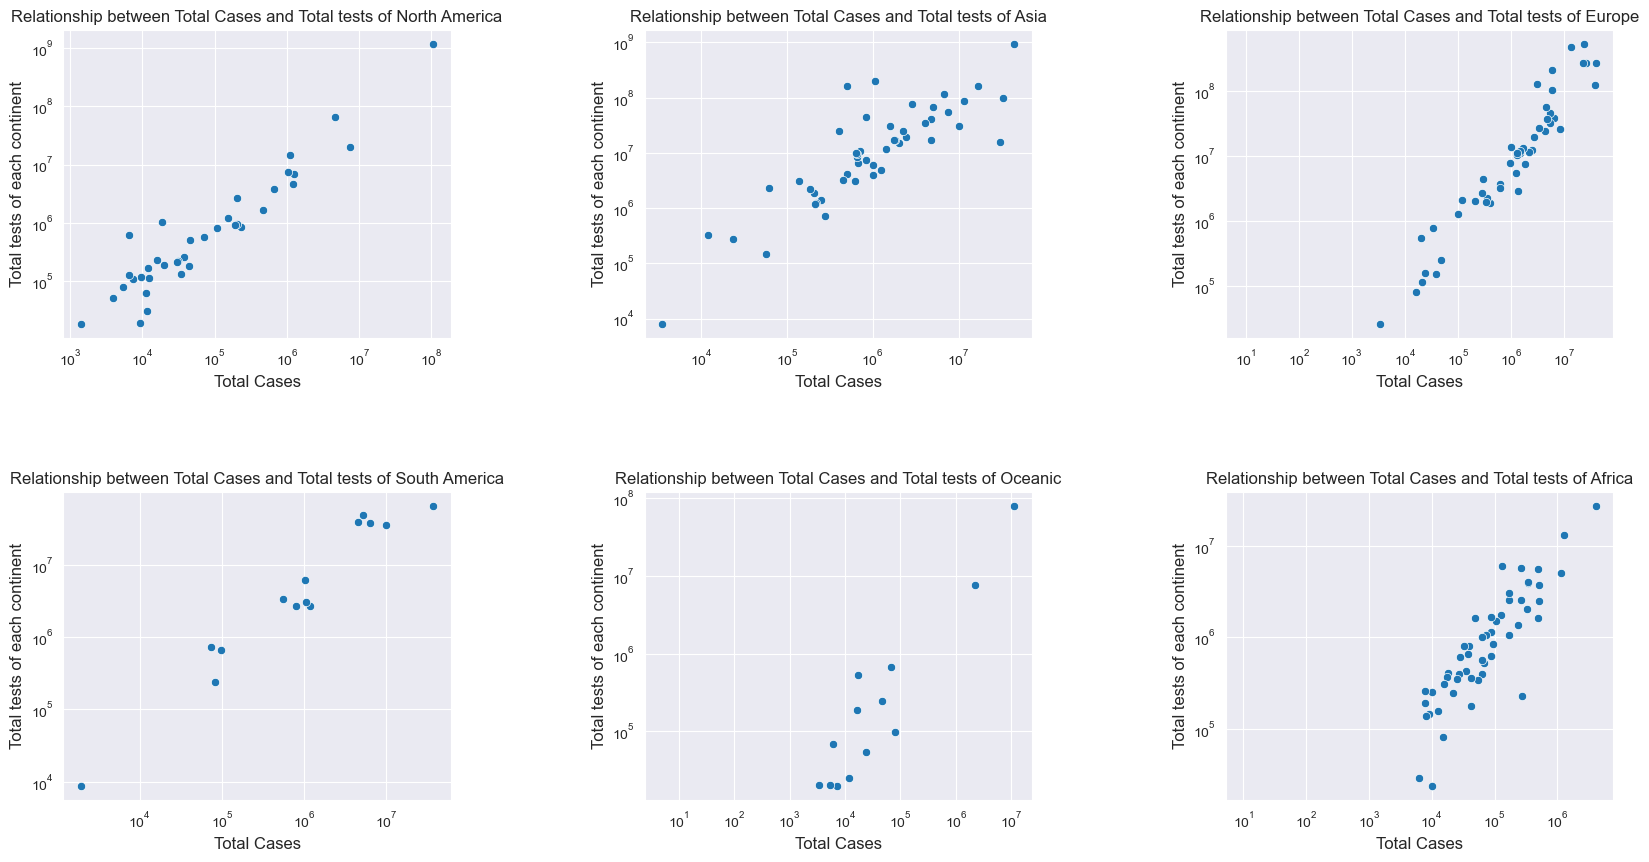

In [67]:
df = pd.read_csv("covid_day_15a.csv")
df = preprocess_df(df)

df['Total tests of each continent'] = df['Tests/1M Pop'] / 1000000 * df['Population']
continent_list = df['Continent'].unique()
continent_list = continent_list[~pd.isnull(continent_list)] # remove NaN values
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # adjust spacing between subplots
axes = axes.flatten()
for i, continent in enumerate(continent_list):
    continent_df = df[df['Continent'] == continent]
    sns.scatterplot(x='Total Cases', y='Total tests of each continent', data=continent_df, ax=axes[i])
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Total Cases', fontsize=12)
    axes[i].set_ylabel('Total tests of each continent', fontsize=12)
    axes[i].set_title(f'Relationship between Total Cases and Total tests of {continent}', fontsize=12)
    axes[i].tick_params(labelsize=10)
plt.show()

### 2.4. Total Cases, Total Recovered and Total Deaths around the world

- We use bubble plot to show relationships between Total Cases, Total Recovered and Total Deaths among all the countries that have high total cases

In [68]:
# Filter data for countries with at least 1 million total cases
df = pd.read_csv('covid_day_15a.csv')
df = preprocess_df(df)

continent_list = df['Continent'].unique()
continent_list = continent_list[~pd.isnull(continent_list)]

# Filter data for countries with at least 1 million total cases
df_filtered = df[df['Total Cases'] >= 1000000]

df_filtered = df_filtered.drop([0,1,2,3,4,5,7]).reset_index(drop=True)

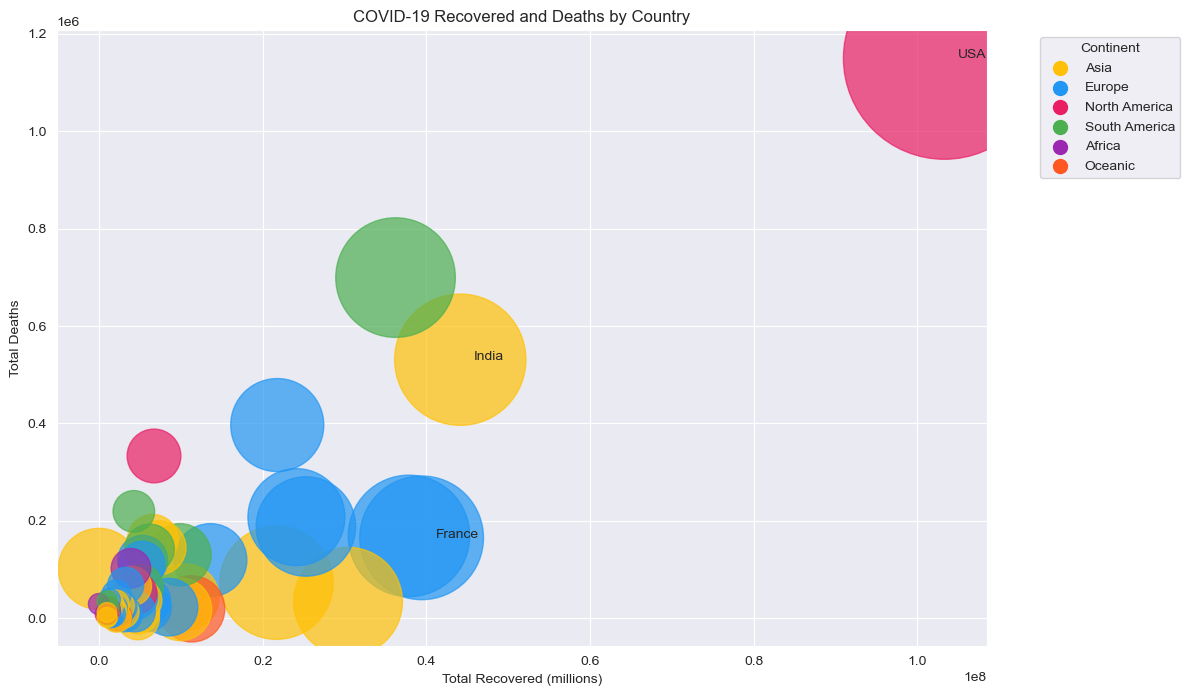

In [69]:
# Define size of bubbles using total cases
bubble_sizes = df_filtered['Total Cases'].apply(lambda x: x/5000)

# Define color of bubbles using continent
continent_colors = {'Asia': '#FFC107', 'Europe': '#2196F3', 'North America': '#E91E63', 
                    'South America': '#4CAF50', 'Africa': '#9C27B0', 'Oceanic': '#FF5722', 
                    '': '#607D8B'}
bubble_colors = (df_filtered['Continent'].apply(lambda x: continent_colors[x]))

# Get the top 3 countries with the highest total cases
top3_countries = df_filtered.nlargest(3, 'Total Cases')

# Create bubble plot
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_filtered['Total Recovered'], df_filtered['Total Deaths'], s=bubble_sizes, c=bubble_colors, alpha=0.7)

# Set axis labels and plot title
ax.set_xlabel('Total Recovered (millions)')
ax.set_ylabel('Total Deaths')
ax.set_title('COVID-19 Recovered and Deaths by Country')

# Add legend for bubble colors
legend_handles = []
for continent in continent_colors:
    if continent != '':
        legend_handles.append(plt.scatter([], [], s=100, c=continent_colors[continent], label=continent))
ax.legend(handles=legend_handles, title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, row in top3_countries.iterrows():
    ax.annotate(row['Country, Other'], xy=(row['Total Recovered'], row['Total Deaths']), xytext=(10,0), 
                textcoords='offset points', fontsize=10)

plt.show()

---

# 3. Intersting insights into country characteristics

### 3.1. Comparison between Japan and S.Korea

- We use radar chart to compare Japan and S.Korea on Total Cases, Total Deaths, Total Recovered, Active Cases and Total Tests

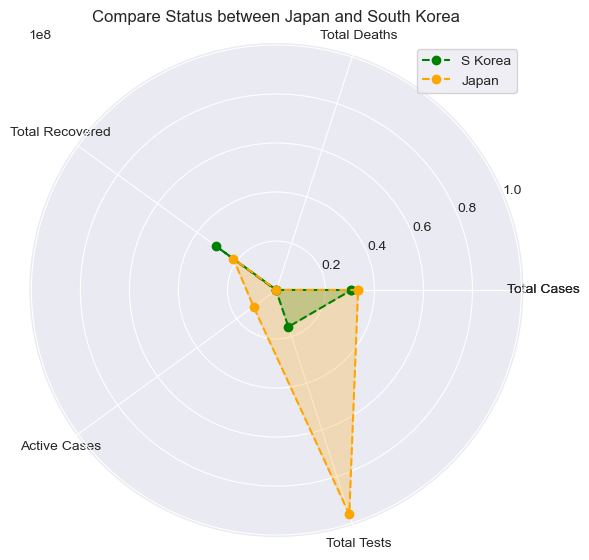

In [70]:
subjects = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests']
s_korea_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'S Korea']
s_korea_df = s_korea_df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests']]
s_korea = [s_korea_df['Total Cases'].tolist()[0], s_korea_df['Total Deaths'].tolist()[0],
           s_korea_df['Total Recovered'].tolist()[0], s_korea_df['Active Cases'].tolist()[0],
           s_korea_df['Total Tests'].tolist()[0]]

japan_df = covid_df_day_14[covid_df_day_14['Country, Other'] == 'Japan']
japan_df = japan_df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests']]
japan = [japan_df['Total Cases'].tolist()[0], japan_df['Total Deaths'].tolist()[0],
         japan_df['Total Recovered'].tolist()[0], japan_df['Active Cases'].tolist()[0], japan_df['Total Tests'].tolist()[0]]

angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
subjects.append(subjects[0])
s_korea.append(s_korea[0])
japan.append(japan[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
# s korea plot
ax.plot(angles, s_korea, 'o--', color='g', label='S Korea')
ax.fill(angles, s_korea, alpha=0.25, color='g')
# japan plot
ax.plot(angles, japan, 'o--', color='orange', label='Japan')
ax.fill(angles, japan, alpha=0.25, color='orange')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.title('Compare Status between Japan and South Korea')
plt.show()

- Japan has a significant greater Total Tests compared with S.Korea. Japan also have bigger Active Cases. Looking at the chart, S.Korea has controlled Covid-19 better.

### 3.2 Top 20 countries for each features

- We use radial bar chart to show comparison between top 20 highest countries for each features 

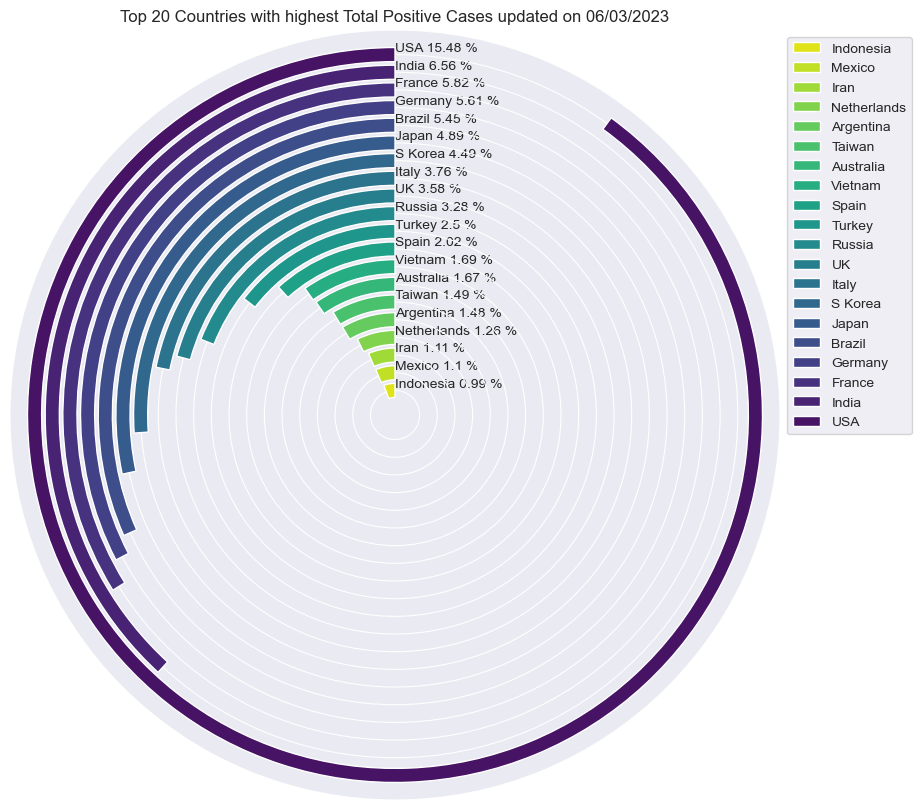

In [71]:
import math
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal


covid_df_day7 = pd.read_csv("covid_day7.csv")
data7 = preprocess_df(covid_df_day7)

world_total = data7[data7['Country, Other'] == 'World']

data7 = data7.drop([0,1,2,3,4,5,7])
data7 = data7.head(20)
data7 = data7.sort_values(by=['Total Cases'])

world_total_cases = world_total['Total Cases']

data7['Total Cases / World'] = round((data7['Total Cases'] / float(world_total_cases) * 100), 2)
data7['Total Cases / World'] = data7['Total Cases / World'].astype(str)
data7['Total Cases / World'] = data7['Country, Other']+' '+data7['Total Cases / World']+' %'


pal_vi = get_color('viridis_r', 20)
plt.gcf().set_size_inches(10, 10)
sns.set_style('darkgrid')

#set max value
max_val = max(data7['Total Cases'])*1.0001
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(20), labels= data7['Total Cases / World'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(20):
    ax.barh(i, list(data7['Total Cases'])[i]*1.8*np.pi/max_val,
            label=list(data7['Country, Other'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 20 Countries with highest Total Positive Cases updated on 06/03/2023')
plt.show()

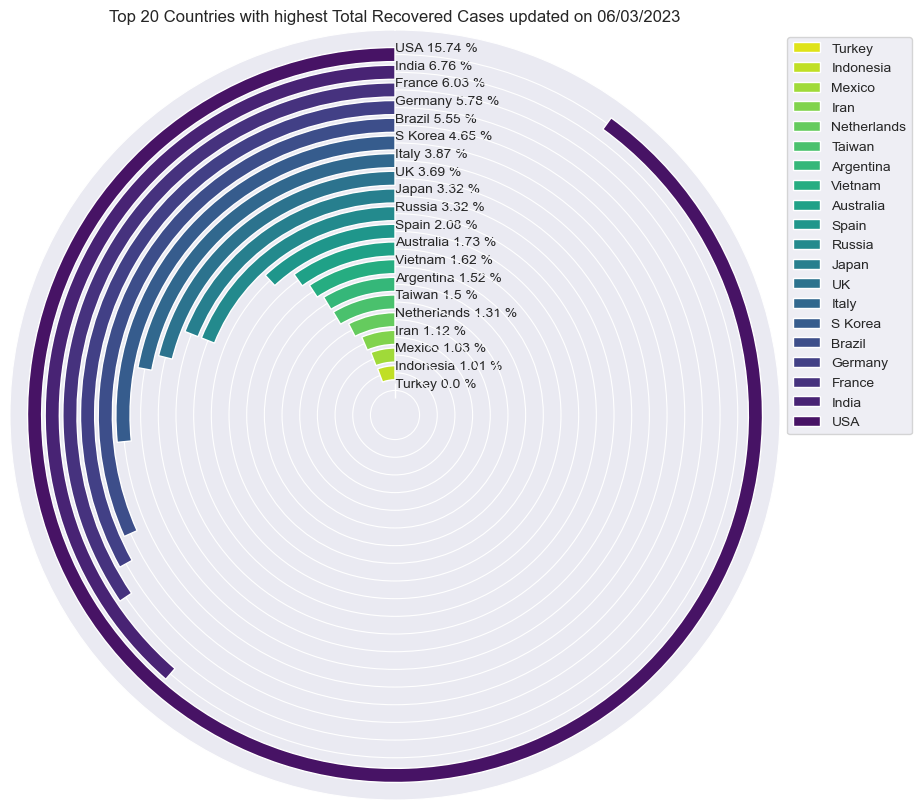

In [72]:
data7 = data7.sort_values(by=['Total Recovered'])

world_total_recovered = world_total['Total Recovered']

data7['Total Recovered / World'] = round((data7['Total Recovered'] / float(world_total_recovered) * 100), 2)
data7['Total Recovered / World'] = data7['Total Recovered / World'].astype(str)
data7['Total Recovered / World'] = data7['Country, Other']+' '+data7['Total Recovered / World']+' %'


max_val = max(data7['Total Recovered'])*1.0001
ax = plt.subplot(projection='polar')

pal_vi = get_color('viridis_r', 20)
plt.gcf().set_size_inches(10, 10)
sns.set_style('darkgrid')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(20), labels= data7['Total Recovered / World'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(20):
    ax.barh(i, list(data7['Total Recovered'])[i]*1.8*np.pi/max_val,
            label=list(data7['Country, Other'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 20 Countries with highest Total Recovered Cases updated on 06/03/2023')
plt.show()

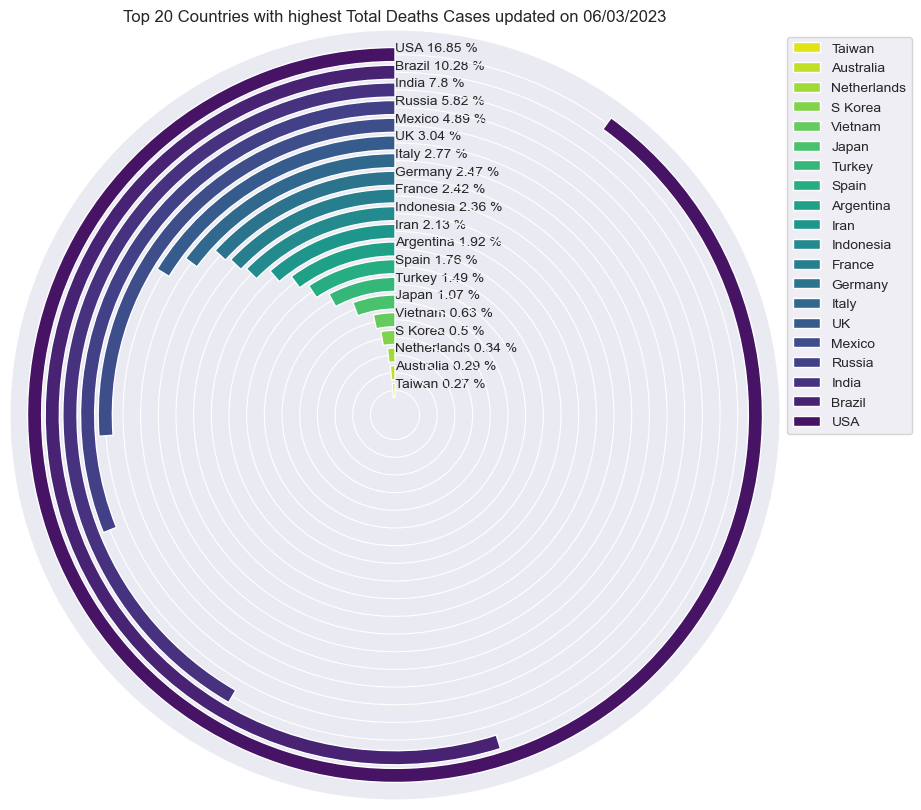

In [73]:
data7 = data7.sort_values(by=['Total Deaths'])

world_total_deaths = world_total['Total Deaths']

data7['Total Deaths / World'] = round((data7['Total Deaths'] / float(world_total_deaths) * 100), 2)
data7['Total Deaths / World'] = data7['Total Deaths / World'].astype(str)
data7['Total Deaths / World'] = data7['Country, Other']+' '+data7['Total Deaths / World']+' %'

max_val = max(data7['Total Deaths'])*1.0001
ax = plt.subplot(projection='polar')

pal_vi = get_color('viridis_r', 20)
plt.gcf().set_size_inches(10, 10)
sns.set_style('darkgrid')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(20), labels= data7['Total Deaths / World'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(20):
    ax.barh(i, list(data7['Total Deaths'])[i]*1.8*np.pi/max_val,
            label=list(data7['Country, Other'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 20 Countries with highest Total Deaths Cases updated on 06/03/2023')
plt.show()

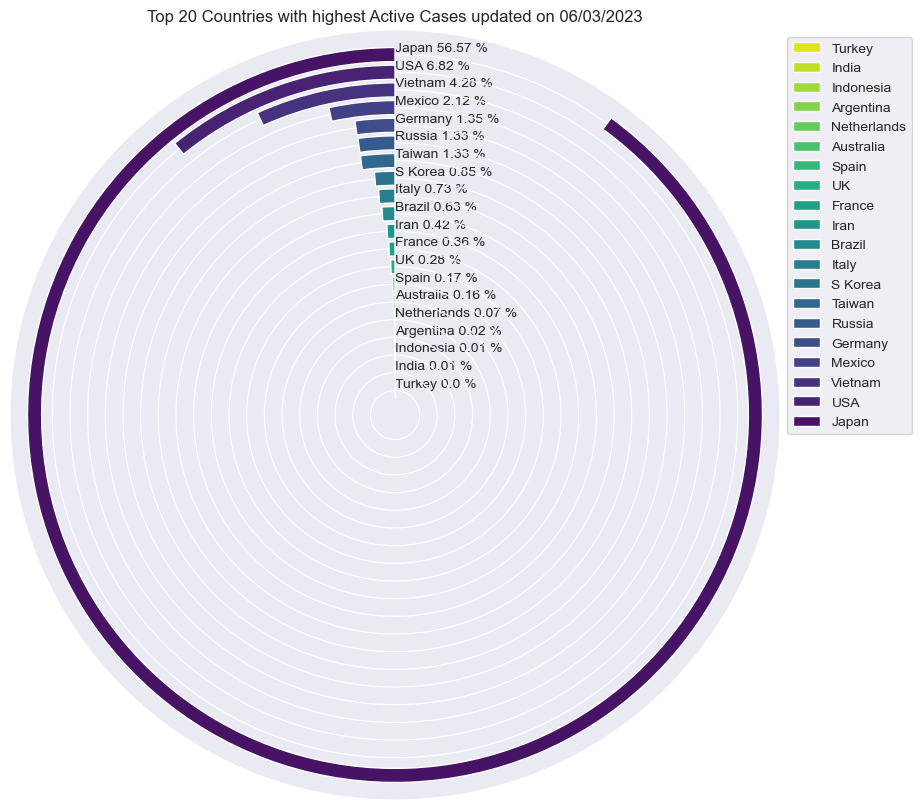

In [74]:
data7 = data7.sort_values(by=['Active Cases'])

world_active_cases = world_total['Active Cases']

data7['Active Cases / World'] = round((data7['Active Cases'] / float(world_active_cases) * 100), 2)
data7['Active Cases / World'] = data7['Active Cases / World'].astype(str)
data7['Active Cases / World'] = data7['Country, Other']+' '+data7['Active Cases / World']+' %'

max_val = max(data7['Active Cases'])*1.0001
ax = plt.subplot(projection='polar')

pal_vi = get_color('viridis_r', 20)
plt.gcf().set_size_inches(10, 10)
sns.set_style('darkgrid')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(20), labels= data7['Active Cases / World'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(20):
    ax.barh(i, list(data7['Active Cases'])[i]*1.8*np.pi/max_val,
            label=list(data7['Country, Other'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 20 Countries with highest Active Cases updated on 06/03/2023')
plt.show()

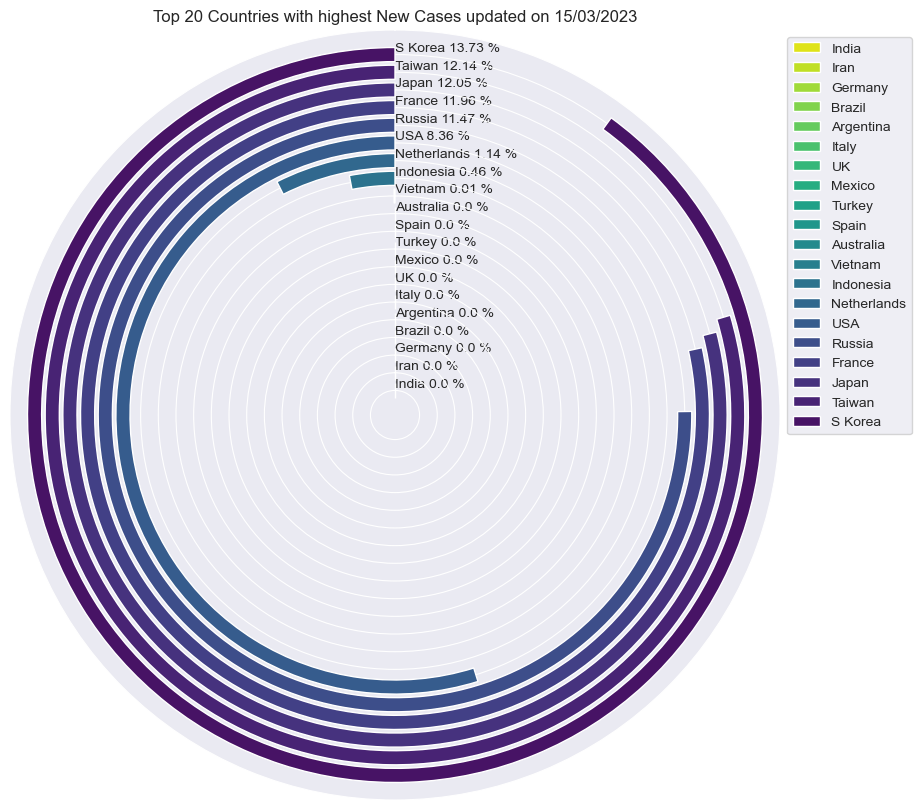

In [75]:
covid_df_day15 = pd.read_csv("covid_day_15a.csv")
data15 = preprocess_df(covid_df_day15)

world_new_cases = data15[data15['Country, Other'] == 'World']['New Cases']

data15 = data15.drop([0,1,2,3,4,5,7])
data15 = data15.head(20)
data15 = data15.sort_values(by=['New Cases'])

data15['New Cases / World'] = round((data15['New Cases'] / float(world_new_cases) * 100), 2)
data15['New Cases / World'] = data15['New Cases / World'].astype(str)
data15['New Cases / World'] = data15['Country, Other']+' '+data15['New Cases / World']+' %'


pal_vi = get_color('viridis_r', 20)
plt.gcf().set_size_inches(10, 10)
sns.set_style('darkgrid')

#set max value
max_val = max(data15['New Cases'])*1.0001
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(20), labels= data15['New Cases / World'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(20):
    ax.barh(i, list(data15['New Cases'])[i]*1.8*np.pi/max_val,
            label=list(data15['Country, Other'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 20 Countries with highest New Cases updated on 15/03/2023')
plt.show()

- USA shows they are destructively impacted by Corona Virus as we can see they always lead in Total Cases and Death Cases as outlier to other nations
- In 15/03/2023, there are still some countries have really high indicate in New Cases like South Korea, Japan, Russia, USA, France which are some of top Power Countries

### 3.3. Total Cases and Total Recovered by 4 Most New Cases Nations

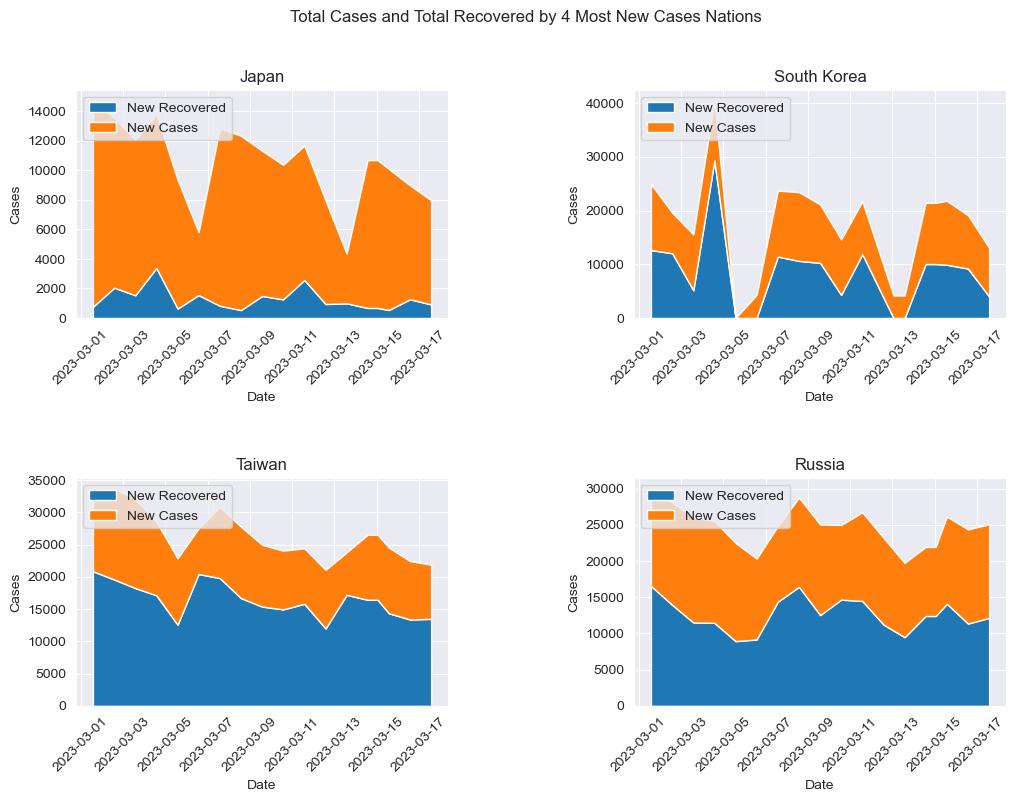

In [76]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
a = country_df[country_df['Country, Other'] == 'Japan']
date = a['Date']
variable1 = a['New Recovered'].tolist()
variable2 = a['New Cases'].tolist()

axs[0, 0].stackplot(date, variable1, variable2, labels=['New Recovered', 'New Cases'])
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('Japan')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Cases')
axs[0, 0].tick_params(axis='x', labelrotation=45)

a = country_df[country_df['Country, Other'] == 'S Korea']
date = a['Date']
variable1 = a['New Recovered'].tolist()
variable2 = a['New Cases'].tolist()
axs[0, 1].stackplot(date, variable1, variable2, labels=['New Recovered', 'New Cases'])
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('South Korea')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Cases')
axs[0, 1].tick_params(axis='x', labelrotation=45)
a = country_df[country_df['Country, Other'] == 'Taiwan']
date = a['Date']
variable1 = a['New Recovered'].tolist()
variable2 = a['New Cases'].tolist()

axs[1, 0].stackplot(date, variable1, variable2, labels=['New Recovered', 'New Cases'])
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('Taiwan')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Cases')
axs[1, 0].tick_params(axis='x', labelrotation=45)
a = country_df[country_df['Country, Other'] == 'Russia']
date = a['Date']
variable1 = a['New Recovered'].tolist()
variable2 = a['New Cases'].tolist()
axs[1, 1].stackplot(date, variable1, variable2, labels=['New Recovered', 'New Cases'])
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('Russia')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Cases')
axs[1, 1].tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(hspace=0.7, wspace=0.5)
fig.suptitle('Total Cases and Total Recovered by 4 Most New Cases Nations')
plt.show()


- These are 4 top countries with highest indicate of New Cases
- The Recovered Cases are really much more than New Cases that makes these countries facing a big trouble of how to deal with increasing number of patients every day
- Especially Japan, New Recovered Cases are dominant to New Cases, Japanese Government should have some solutions to scale down the number of New Cases

---
  
  
<div align="center"><font size="10">  Thank You for your Review </font></div>